In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
#create a model class that inherits nn.Module
#dizer qual o tipo de flor iris
class Model(nn.Module):
    #Input layer (4 features of the flower) 
    #--> Hidden Layer1
    #--> .. 
    #--> Hidden LayerN 
    #--> Output
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #vai instanciar a classe
        #vai da entrada pra h1
        self.fc1 = nn.Linear(in_features, h1)
        #vai de h1 pra h2
        self.fc2 = nn.Linear(h1, h2)
        #vai de h2 pra output
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        #vai empurrando pra frente
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
#sementezinha azar
torch.manual_seed(41)

model = Model()

model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\arthu\AppData\Local\Temp\ipykernel_636\2225940201.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
myDf = pd.read_csv(url)

In [6]:
#de strings pra inteiros
myDf['species'] = myDf['species'].replace('setosa',0.0)
myDf['species'] = myDf['species'].replace('versicolor',1.0)
myDf['species'] = myDf['species'].replace('virginica',2.0)
myDf

C:\Users\arthu\AppData\Local\Temp\ipykernel_636\2851050775.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  myDf['species'] = myDf['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
#training
#pegando os parâmetros
x = myDf.drop('species',axis=1)
#pegando os resultados
y = myDf['species']

In [8]:
#convertendo pra np arrays
x = x.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
#train test split
#20% do dataset pra teste, 80% pra treino
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

In [11]:
#convertendo pra tensores
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
#definir o quanto a saida ta diferente da entrada
criterion = nn.CrossEntropyLoss()
#escolher um otimizador (?) e uma taxa de aprendizado (até a taxa de erro ficar abaixo disso)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [13]:
#treinar!
#epoch? (um rodada até o final da nossa rede)
epoch = 100
losses = []
for i in range(epoch):
    #frente!
    y_pred = model.forward(x_train) #pega a primeira passagem

    #calcular a quantiade de discrepancia que a gente achou
    loss = criterion(y_pred, y_train)

    #continuar tendo em vista oq a gente ta melhorando
    losses.append(loss.detach().numpy())

    #printar pra ver como tamo indo
    if (i % 10 == 0):
        print(f'Epoch:{i} com perda {loss}')
    
    #backpropagation (eu vou voltando pra acertar minha rede neural)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0 com perda 1.1251550912857056
Epoch:10 com perda 1.0096259117126465
Epoch:20 com perda 0.8157405853271484
Epoch:30 com perda 0.585706353187561
Epoch:40 com perda 0.3999636471271515
Epoch:50 com perda 0.26768797636032104
Epoch:60 com perda 0.17942361533641815
Epoch:70 com perda 0.1215168908238411
Epoch:80 com perda 0.0860118418931961
Epoch:90 com perda 0.06520850211381912


Text(0, 0.5, 'epoch')

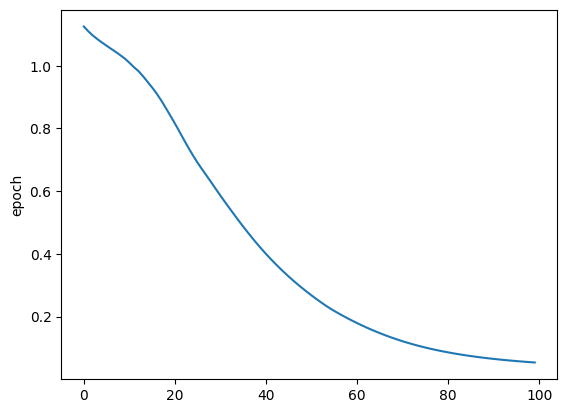

In [14]:
#graficamente!!!!!!!!!
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.ylabel("epoch")

In [16]:
#começo do teste
with torch.no_grad(): #não volta mais pro backpropagation
    y_eval = model.forward(x_test) #y_eval são classificações
    loss = criterion(y_eval,y_test) #ver a discrepância


In [17]:
loss

tensor(0.1315)

In [22]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_eval = model.forward(data)
        #printando o tipo de flor
        print(f'{i+1}.) {str(y_eval)} \t {y_test[i]} \t {y_eval.argmax().item()}')

        #correto?
        if y_eval.argmax().item() == y_test[i]:
            correct += 1

print(f'corretos: {correct}')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [24]:
#inserindo novos dados
new_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
    print(model(new_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [25]:
#salvar e carregar o modelo de NN
torch.save(model.state_dict(), "modelinho.pt")

In [27]:
new_model = Model()
new_model.load_state_dict(torch.load("modelinho.pt"))
with torch.no_grad():
    print(new_model(new_iris))

tensor([-5.9944,  4.5077,  6.6792])
